<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_581/NGC_581_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [ ]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 43.5MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=94a5f3383b0ef37f548fd2a29cf94036548fc71d774c3eaba9cbca89960a8a19
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [ ]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [ ]:
## making a GAIA cone_search of 30m radius around NGC581 center

coordinate = coord.SkyCoord.from_name('NGC581')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (23.34583333, 60.65)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [ ]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 509862821919372288,509862821919372288,47528498,2015.5,23.342139,1.604631,60.649335,1.924199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,74,3,-1.690774,50.439827,0.000000,0.000000e+00,3,False,0.013024,NaN,NaN,0.064572,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.050758,-1.805004,49.391006,46.257850,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001937
1,1635721458409799680,Gaia DR2 509862821917654528,509862821917654528,1136255935,2015.5,23.348224,0.139566,60.647837,0.177842,-0.117917,0.265819,-0.443600,-0.968698,0.239517,-0.755574,0.333036,-0.344465,0.233086,-0.361592,0.023643,-0.111166,-0.073079,-0.014817,-0.328323,0.382878,-0.534408,431,9,430,1,-0.220854,417.933929,0.000000,0.000000e+00,31,False,0.280584,1.500798,0.040730,-0.014264,...,475.126210,6.379536,74.476608,18.069897,1.413960,0,1.256254,0.423300,0.832954,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.053945,-1.805999,49.393524,46.255003,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002456
2,1635721458409799680,Gaia DR2 509862821917646848,509862821917646848,155749623,2015.5,23.344755,1.478474,60.652509,1.737626,5.535791,2.359475,2.346196,3.956021,2.288899,0.605896,3.020984,0.068784,0.569105,-0.225318,-0.318779,-0.304135,-0.396514,-0.257745,0.012941,0.018103,0.083448,102,0,100,2,2.308400,129.681671,3.333368,1.373995e+00,31,False,0.013662,1.700624,0.358144,0.133700,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051509,-1.801664,49.395005,46.259868,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002566
3,1635721458409799680,Gaia DR2 509862821917646976,509862821917646976,324531031,2015.5,23.344351,0.267437,60.652526,0.315644,1.245240,0.500280,2.489087,-2.935483,0.498879,4.157978,0.617648,-0.325415,0.187524,-0.255984,0.024045,-0.270366,-0.010201,-0.091205,-0.220582,0.272263,-0.549402,435,0,433,2,10.904075,831.817810,2.098145,6.998055e+00,31,False,0.069347,1.523048,0.080300,-0.036152,...,359.104309,5.585718,64.289734,18.373869,1.895344,0,1.528061,0.289089,1.238972,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051310,-1.801679,49.394775,46.259987,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002631
4,1635721458409799680,Gaia DR2 509862821919736832,509862821919736832,10975901,2015.5,23.341592,2.689071,60.651851,3.262242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

##### Applying Filter:

In [ ]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [ ]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [ ]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [ ]:
all_stars_filtered.shape

(25961, 99)

##### Visualizing GAIA data

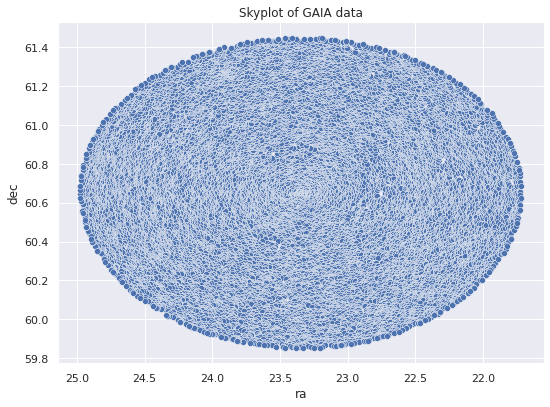

In [ ]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [ ]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [ ]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [ ]:
## saving only NGC 581 data from Cantat GAIA DR2 paper

cantat_581 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_581")
cantat_581 = cantat_581[0].to_pandas()
cantat_581

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,23.444496,60.711214,509864230674369664,0.4203,-1.305,-0.111,NaN,17.485600,1.7305,0.1,NGC_581,23.444507,60.711214
1,23.366839,60.571187,509861447535756416,0.3875,-1.400,-0.631,NaN,15.760600,0.8743,0.9,NGC_581,23.366851,60.571189
2,23.139522,60.607261,509850796015034752,0.3732,-0.647,-0.651,NaN,15.411700,1.0211,0.1,NGC_581,23.139527,60.607263
3,23.379967,60.647975,509862169084115200,0.3209,-1.256,-0.624,NaN,17.417801,1.1832,0.3,NGC_581,23.379978,60.647978
4,23.181250,60.669540,509874538595633152,0.3057,-1.849,-0.380,NaN,16.319901,0.8084,0.1,NGC_581,23.181266,60.669541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23.330910,60.679827,509863028083270656,0.3097,-1.386,-0.559,NaN,11.704800,0.3024,0.6,NGC_581,23.330922,60.679829
302,23.256299,60.768428,509876737611440768,0.4223,-0.963,-0.726,NaN,17.515200,1.3165,0.3,NGC_581,23.256307,60.768431
303,23.491549,60.548354,509858286439769344,0.3422,-1.321,-0.518,NaN,14.846400,0.6234,1.0,NGC_581,23.491561,60.548357
304,23.204670,60.602775,509839079344255744,0.3770,-1.424,-0.456,NaN,14.848400,0.6502,1.0,NGC_581,23.204683,60.602777


In [ ]:
# renaming the cantat table to match it with gaia_data
cantat_581 = cantat_581.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [ ]:
# taking the subset of only source_id and PMemb
cantat_581 = cantat_581.loc[:,['source_id', 'PMemb']]


In [ ]:
# join the two table on source_id
cantat_581 = all_stars_filtered.join(cantat_581.set_index('source_id'), on='source_id')

In [ ]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_581 = cantat_581.dropna(subset=['PMemb'])
cantat_581

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,26.600638,9.164910,0.8
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,41.473889,11.277138,0.9
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,33.754465,4.240307,0.5
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350

In [ ]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_581.to_csv('NGC_581_cantat.csv')
# all_stars.to_csv('NGC_581_Gaia_30m.csv')

In [ ]:
cantat_581.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.670000e+02,2.670000e+02,2.670000e+02,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,2.660000e+02,266.000000,266.000000,266.000000,266.000000,267.000000,266.000000,266.000000,266.000000,2.000000,2.000000,267.000000,2.000000,2.00000,2.0,267.000000,267.000000,267.000000,267.000000,224.000000,224.000000,224.000000,224.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,267.000000,267.000000,267.000000,267.000000
mean,1.635721e+18,5.098628e+17,8.540371e+08,2015.5,23.330503,0.028689,60.659063,0.033327,0.367330,0.048839,9.614844,-1.387377,0.050012,-0.542598,0.065217,-0.277339,0.144364,-0.438381,0.081163,-0.130608,0.014315,-0.167820,-0.138793,0.212872,-0.504617,441.014981,40.685393,437.610487,3.404494,1.083980,482.858215,0.019025,0.298934,31.0,40.954811,1.588590,0.008112,-0.027482,50.509363,19.059925,...,1.844411e+05,409.341755,648.882507,14.829006,1.251876,0.022472,0.932441,0.373573,0.558868,-49.753553,0.612721,0.149813,5000.000000,3.75000,0.0,128.043557,-1.796269,49.391494,46.269133,100027.857143,5987.355957,5735.266602,6293.960938,1.141717,0.814147,1.427530,0.574546,0.404568,0.719590,200111.0,5.284849,4.829564,5.702376,225.905777,187.249664,264.561890,0.075367,35.429630,10.394711,0.582023
std,0.000000e+00,8.516773e+12,4.986873e+08,0.0,0.122878,0.014908,0.062493,0.017469,0.053889,0.025519,4.846479,0.229789,0.025892,0.177329,0.033589,0.090950,0.082057,0.063423,0.069967,0.079440,0.076259,0.076841,0.085245,0.070145,0.069112,32.351218,124.630696,32.887681,5.302969,5.078258,209.209549,0.065516,1.242774,0.0,77.136337,0.070800,0.004212,0.027772,3.651515,1.027884,...,1.708930e+06,3155.761566,396.034668,1.678544,0.119700,0.148491,0.355438,0.193452,0.186120,6.258113,0.414016,2.016853,707.106812,1.06066,0.0,0.061529,0.061231,0.082961,0.065139,230.796374,1156.451050,1082.770996,1240.789673,0.373470,0.367881,0.401953,0.187806,0.183072,0.203289,0.0,25.174301,22.985153,27.008451,1675.986694,1386.572388,1966.299072,0.044382,17.754373,5.809815,0.315357
min,1.635721e+18,5.098376e+17,2.885440e+05,2015.5,23.006206,0.009833,60.517240,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.168981,-0.653858,-0.118199,-0.461236,-0.206913,-0.399843,-0.444580,-0.008753,-0.635927,264.000000,0.000000,248.000000

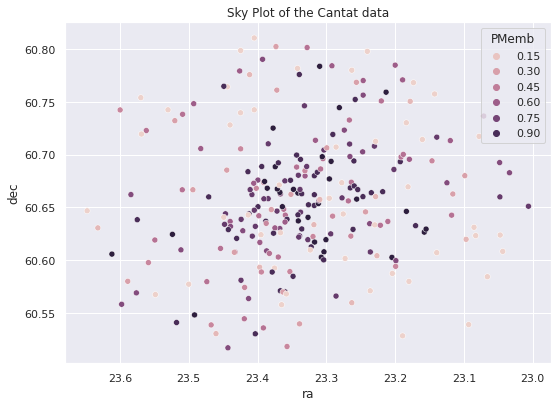

In [ ]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_581['ra'], y = cantat_581['dec'], 
                          hue = cantat_581['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [ ]:
# import member dataset
member = cantat_581.copy()

In [ ]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_581_center'] = distance

In [ ]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_581_center)
cantat_radius

0.1664977239990226

In [ ]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,26.600638,9.164910,0.8,0.006020,1
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,41.473889,11.277138,0.9,0.007319,1
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,33.754465,4.240307,0.5,0.008064,1
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350,0.3146,0.7280,200111,3.628262,3.370500,3.941872,41.880226,35.

In [ ]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_581_center'] = distance

In [ ]:
non_member = all_stars_filtered[all_stars_filtered['dist_581_center'] >= 0.7].sample(len(member), random_state = 42)

In [ ]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_581_center,member
174487,1635721458409799680,Gaia DR2 510629525120142848,510629525120142848,1016885256,2015.5,22.019361,0.016452,61.108171,0.017556,0.267184,0.025895,10.318163,-1.355081,0.028618,2.863603,0.033351,-0.104043,0.013312,-0.441160,-0.029364,-0.048348,-0.077693,-0.218222,-0.045646,0.174947,-0.359037,365,0,364,1,7.189159,587.221619,0.152292,7.622512e+00,31,False,32.241936,1.354568,0.004609,-0.000339,...,1.383928,0,2.209394,1.150434,1.058960,-45.451406,1.180422,13,4500.0,3.0,0.0,NOT_AVAILABLE,127.344528,-1.449278,48.955803,46.989674,100001,3972.197510,3588.000000,4194.214844,1.5777,1.2804,1.907,0.819,0.6450,0.9360,200111,20.826664,18.680136,25.525631,97.28759,73.529739,121.045441,https://gea.esac.esa.int/data-server/datalink/...,,0.791585,47.351219,85.863453,0.787824,0
167539,1635721458409799680,Gaia DR2 509949889498542720,509949889498542720,900761199,2015.5,24.468782,0.030036,61.200521,0.033341,0.333310,0.053902,6.183630,-1.649864,0.050493,-1.397081,0.066212,-0.256702,-0.054608,-0.423666,-0.026274,0.012139,-0.036754,-0.142305,-0.103277,0.231857,-0.445572,386,0,385,1,-2.380596,317.485413,0.000000,2.061928e-15,31,False,7.670057,1.530826,0.008788,-0.025939,...,1.252475,0,1.185544,0.509615,0.675929,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.496360,-1.168528,50.485811,46.437922,100001,4885.000000,4792.500000,4919.333496,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.775124,32.675287,21.100219,0.771834,0
139228,1635721458409799680,Gaia DR2 509459850912114944,509459850912114944,752130151,2015.5,22.387265,0.027995,60.130260,0.031986,0.334278,0.046201,7.235373,1.350948,0.050927,-4.786712,0.066702,-0.342161,0.032663,-0.506262,0.180489,-0.081347,0.138761,-0.292445,0.006193,0.033800,-0.563730,552,0,550,2,0.269760,553.281067,0.000000,0.000000e+00,31,False,5.826405,1.500933,0.007039,-0.015962,...,1.268443,0,1.306076,0.573803,0.732273,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,127.664697,-2.390814,48.416439,46.067073,100001,4867.310059,4681.155273,5075.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.703160,26.527076,71.762866,0.705717,0
160489,1635721458409799680,Gaia DR2 510618461284524800,510618461284524800,1270827244,2015.5,21.831717,0.015186,60.809501,0.017459,0.454228,0.025913,17.529247,7.814620,0.026820,-0.689542,0.033948,-0.292867,0.058314,-0.465086,0.123104,0.003724,0.080019,-0.283885,-0.138267,0.184262,-0.535399,407,0,407,0,-1.636340,356.747925,0.000000,0.000000e+00,31,False,38.882648,1.442789,0.004602,-0.041392,...,1.306405,0,1.693308,0.811948,0.881360,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,127.296222,-1.757773,48.607650,46.787466,100001,4179.906738,3989.155029,4266.750000,NaN,NaN,NaN,NaN,N

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


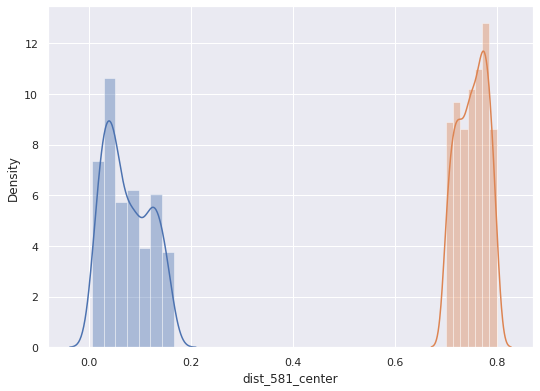

In [ ]:
sns.distplot(member['dist_581_center'])
sns.distplot(non_member['dist_581_center'])
plt.show()

In [ ]:
training_data = pd.concat([member, non_member])

In [ ]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,5.340000e+02,5.340000e+02,5.340000e+02,534.0,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.0,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,532.000000,532.000000,532.000000,534.000000,532.000000,532.000000,532.000000,9.000000,9.000000,534.000000,9.000000,9.000000,9.0,534.000000,534.000000,534.000000,534.000000,377.000000,377.000000,377.000000,377.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,534.000000,534.000000,534.000000,267.000000,534.000000,534.000000
mean,1.635721e+18,5.099397e+17,8.536135e+08,2015.5,23.339239,0.047021,60.649581,0.053189,0.550022,0.077634,10.402367,-0.809641,0.083638,-0.851114,0.105920,-0.293253,0.104134,-0.456575,0.101510,-0.082082,0.043471,-0.203378,-0.112377,0.177685,-0.516817,456.953184,30.280899,453.827715,3.125468,2.379010,938.738159,0.113698,7.796827e+00,31.0,31.219046,1.528673,0.012840,-0.031578,52.220974,18.711610,...,596.376526,15.279578,1.298601,0.035581,1.224366,0.526900,0.697465,-32.612036,1.036348,0.280899,4777.777832,3.333333,0.0,128.048777,-1.802776,49.390995,46.259443,100027.596817,5519.241211,5298.982422,5818.595703,1.226020,0.914597,1.549820,0.613178,0.449570,0.777344,200111.0,4.623761,4.189806,5.014322,149.218109,123.438049,174.998245,0.413709,43.891370,19.313482,0.582023,0.413702,0.500000
std,0.000000e+00,3.017944e+14,4.923121e+08,0.0,0.775092,0.063820,0.378498,0.065738,0.550034,0.099140,9.716859,3.942236,0.116690,2.944935,0.135170,0.128775,0.090806,0.071276,0.099482,0.100142,0.102398,0.114540,0.086293,0.088929,0.101826,72.549884,111.851448,72.183269,4.852920,15.659893,8111.304688,0.497929,1.185898e+02,0.0,69.926910,0.103432,0.016926,0.029921,8.196224,1.235488,...,432.997528,1.710572,0.173894,0.195272,0.498646,0.285359,0.247080,24.614274,0.963113,2.341351,506.896881,0.661438,0.0,0.377589,0.380941,0.558388,0.372154,229.322723,1182.610718,1111.478394,1246.214233,0.461058,0.445310,0.514879,0.230584,0.220018,0.264568,0.0,20.117069,18.359673,21.608017,1333.307739,1103.004028,1564.332520,0.340712,66.620762,36.383035,0.315357,0.340705,0.500469
min,1.635721e+18,5.093938e+17,2.885440e+05,2015.5,21.735214,0.009424,59.869874,0.011431,0.134387,0.016191,3.004112,-33.239630,0.017121,-34.965847,0.022449,-0.582384,-0.194074,-0.658182,-0.308153,-0.461236,-0.305676,-0.582348,-0.444580,-0.197809,-0.721978,264.000000,0.000000,248.000000,0.00000

In [ ]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [ ]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,534.000000,534.000000,534.000000
mean,0.550022,-0.809641,-0.851113
std,0.550034,3.942236,2.944935
min,0.134387,-33.239632,-34.965847
25%,0.331738,-1.537614,-0.921821
50%,0.390296,-1.374635,-0.547208
75%,0.513894,-0.976079,-0.395380
max,4.653856,21.828386,18.690620


In [ ]:
targets.value_counts()

1    267
0    267
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


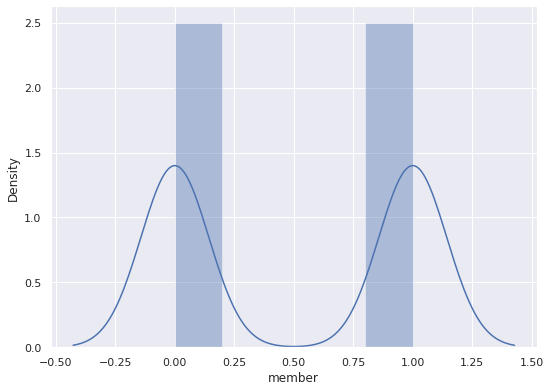

In [ ]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

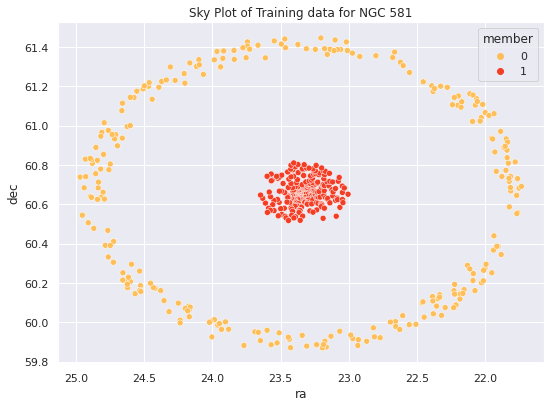

In [ ]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 581')
plt.show()

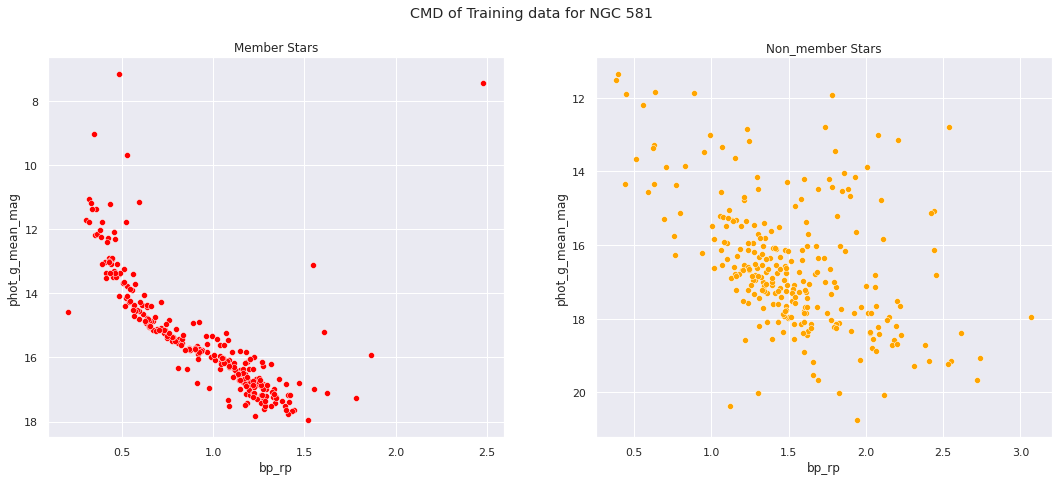

In [ ]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 581 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


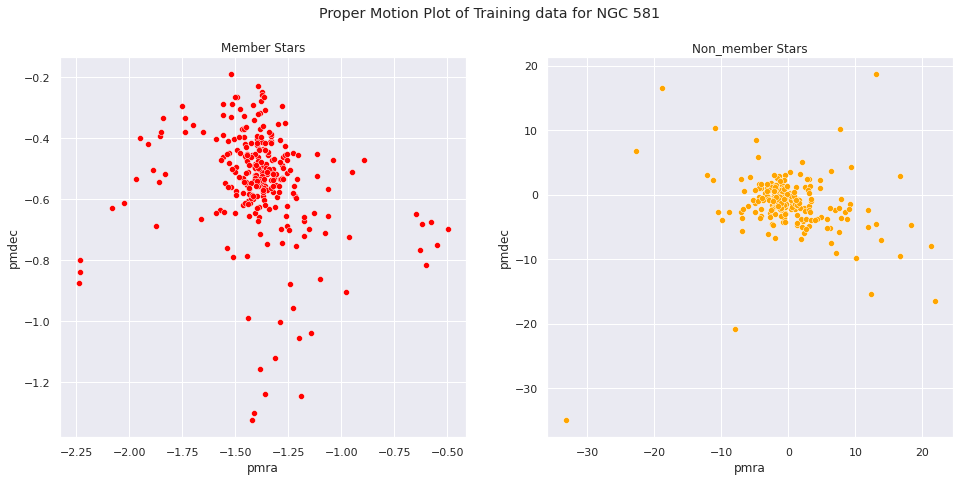

In [ ]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 581 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


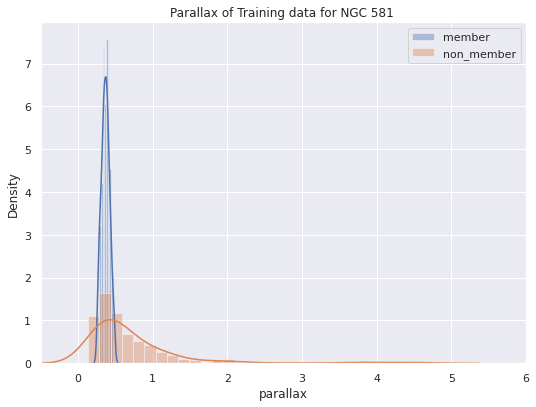

In [ ]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 581 ')
plt.legend()
plt.show()

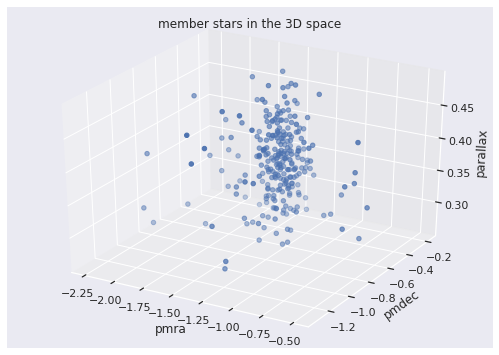

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


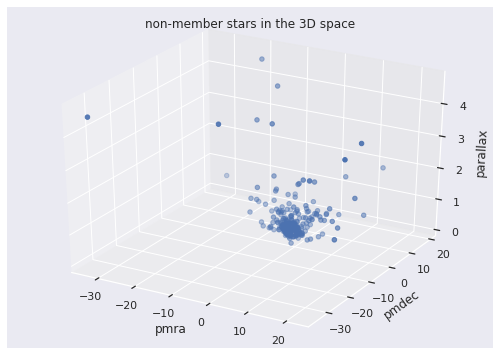

In [ ]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [ ]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.352478
pmdec       0.337287
parallax    0.310235
dtype: float64

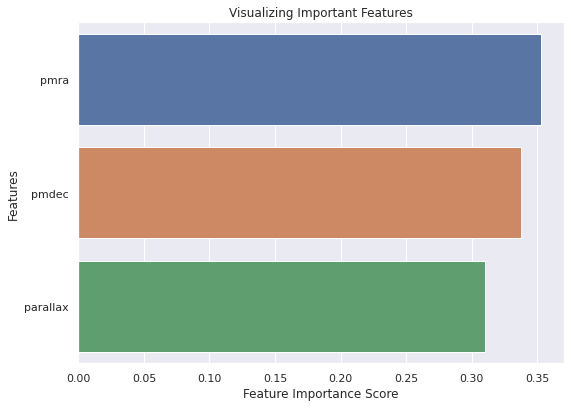

In [ ]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [ ]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [ ]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [ ]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [ ]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.885
Accuracy on test data: 0.925


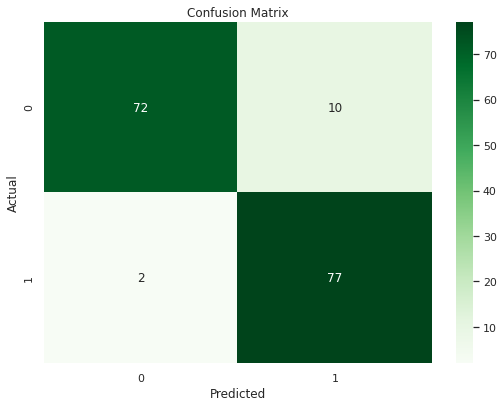

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        82
           1       0.89      0.97      0.93        79

    accuracy                           0.93       161
   macro avg       0.93      0.93      0.93       161
weighted avg       0.93      0.93      0.93       161



In [ ]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.921
Precision on testing data: 0.886
Accuracy on test data: 0.932


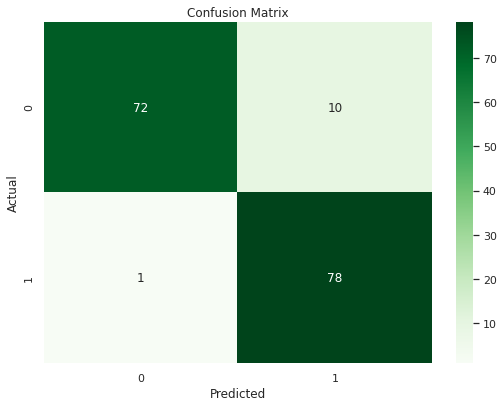

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93        82
           1       0.89      0.99      0.93        79

    accuracy                           0.93       161
   macro avg       0.94      0.93      0.93       161
weighted avg       0.94      0.93      0.93       161



In [ ]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [ ]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center
count,2.596100e+04,2.596100e+04,2.596100e+04,25961.0,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.0,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,25961.000000,...,2.570300e+04,25703.000000,25703.000000,25703.000000,25702.000000,25961.000000,25702.000000,25702.000000,25703.000000,788.000000,788.000000,25961.000000,788.000000,788.000000,788.000000,25961.000000,25961.000000,25961.000000,25961.000000,15782.000000,15782.000000,15782.000000,15782.000000,6635.000000,6635.000000,6635.000000,6635.000000,6635.000000,6635.000000,9819.0,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000,25961.000000,25961.000000,25961.000000,25961.000000
mean,1.635721e+18,5.099868e+17,8.466839e+08,2015.5,23.361146,0.062972,60.643972,0.071336,0.797587,0.103410,12.526440,0.314717,0.113467,-1.390742,0.143325,-0.308729,0.057828,-0.469009,0.129455,-0.039166,0.074959,-0.226709,-0.080332,0.142421,-0.535507,463.982281,16.010708,461.254343,2.727938,2.911673,937.225159,0.205403,11.301372,31.0,19.085186,1.480927,0.016946,-0.036615,52.951658,18.370286,...,3.053521e+04,48.443009,552.676636,15.695020,1.332560,0.061631,1.469105,0.657732,0.811407,-41.006120,1.534263,0.431455,5137.500000,3.384518,-0.051079,128.060320,-1.806312,49.400098,46.249064,100041.250792,4918.451172,4737.272461,5191.508301,1.126698,0.857709,1.461063,0.559548,0.422134,0.729959,200111.0,3.313234,2.977007,3.572203,19.275162,16.004318,22.545954,0.526607,59.480408,29.803050,0.526635
std,0.000000e+00,3.517472e+14,4.884365e+08,0.0,0.815333,0.085063,0.393274,0.094391,0.963005,0.136508,19.166763,7.817663,0.157088,4.803349,0.192133,0.128190,0.098031,0.079249,0.106874,0.094745,0.109189,0.120984,0.100418,0.097749,0.102115,73.454184,83.845025,73.246104,4.041185,15.898232,7877.213379,0.673733,173.389337,0.0,51.103294,0.096217,0.021727,0.032097,8.327864,1.360507,...,4.624439e+05,711.431644,458.753601,1.605085,0.174727,0.264152,0.471023,0.282559,0.222425,36.949525,1.942799,2.607402,668.229126,0.582453,0.269138,0.398374,0.394803,0.580823,0.391255,280.718288,747.016602,707.800476,800.756592,0.516740,0.483555,0.583730,0.260920,0.241284,0.297659,0.0,6.934048,6.315675,7.442142,273.871521,230.392868,317.653381,0.192754,151.965377,68.735140,0.192784
min,1.635721e+18,5.093905e+17,5.827000e+03,2015.5,21.715170,0.008443,59.852482,0.009909,0.068970,0.014476,3.000268,

In [ ]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_581_center'] <= cantat_radius*2]

In [ ]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [ ]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [ ]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [ ]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    4102
1     364
Name: member, dtype: int64

In [ ]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

364

In [ ]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

364

In [ ]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,3.640000e+02,3.640000e+02,3.640000e+02,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,363.000000,363.000000,363.000000,364.000000,363.000000,363.000000,363.000000,4.000000,4.000000,364.000000,4.000000,4.000,4.0,364.000000,364.000000,364.000000,364.000000,277.000000,277.000000,277.000000,277.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.000000
mean,1.635721e+18,5.098559e+17,8.793716e+08,2015.5,23.350836,0.033405,60.649260,0.038288,0.349905,0.057306,7.902686,-1.391758,0.059198,-0.592873,0.076466,-0.286469,0.114923,-0.428657,0.085840,-0.109883,0.032891,-0.195896,-0.141167,0.206281,-0.517199,460.060440,16.472527,457.461538,2.598901,0.670266,495.724854,0.027321,9.191394e-01,31.0,23.235996,1.553649,0.009308,-0.033698,52.472527,18.637363,...,600.220520,15.350199,1.259406,0.019231,1.102546,0.465011,0.637535,-26.481191,1.209170,0.151099,5500.000000,3.375,0.0,128.054809,-1.803938,49.396468,46.255678,100022.685921,5492.738770,5274.254883,5772.120605,1.184414,0.874213,1.509167,0.593677,0.433651,0.763529,200111.0,3.594540,3.209736,3.911866,35.412888,28.884457,41.941349,0.235550,30.834605,9.845926,0.235546,1.0,0.757241
std,0.000000e+00,4.744181e+13,4.729083e+08,0.0,0.352638,0.017849,0.175496,0.020309,0.061468,0.030089,4.358567,0.356025,0.030956,0.205872,0.039777,0.085412,0.081292,0.068442,0.074168,0.078288,0.074677,0.096282,0.097623,0.088245,0.076706,34.089764,87.067067,33.206942,3.486076,5.322897,323.966064,0.083608,7.713274e+00,0.0,54.304272,0.067737,0.004850,0.032169,3.811222,1.065528,...,409.436096,1.352484,0.053167,0.137524,0.338015,0.175686,0.168557,43.288777,0.229462,1.436143,408.248291,0.250,0.0,0.170162,0.178173,0.262079,0.166824,207.379611,980.522949,911.840454,1037.814453,0.444512,0.433461,0.496851,0.224685,0.213294,0.261447,0.0,3.720303,3.348676,3.935324,172.860611,139.516693,206.300842,0.070999,18.043794,6.158023,0.071000,0.0,0.159569
min,1.635721e+18,5.097856e+17,1.322465e+07,2015.5,22.691278,0.009891,60.323639,0.011448,0.240353,0.016178,3.030137,-2.275765,0.017003,-1.230392,0.023191,-0.499662,-0.169424,-0.578097,-0.139639,-0.322759,-0.152948,-0.468784,-0.377795,-0.058535,-0.656098,338.000000,0.000000,334.000000,0.000000,-6.354753,285.537598,0.000000,0.000000e+00,31.0

In [ ]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.670000e+02,2.670000e+02,2.670000e+02,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,266.000000,266.000000,266.000000,267.000000,266.000000,266.000000,266.000000,2.000000,2.000000,267.000000,2.000000,2.00000,2.0,267.000000,267.000000,267.000000,267.000000,224.000000,224.000000,224.000000,224.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0
mean,1.635721e+18,5.098628e+17,8.540371e+08,2015.5,23.330503,0.028689,60.659063,0.033327,0.367330,0.048839,9.614844,-1.387377,0.050012,-0.542598,0.065217,-0.277339,0.144364,-0.438381,0.081163,-0.130608,0.014315,-0.167820,-0.138793,0.212872,-0.504617,441.014981,40.685393,437.610487,3.404494,1.083980,482.858215,0.019025,0.298934,31.0,40.954811,1.588590,0.008112,-0.027482,50.509363,19.059925,...,648.882507,14.829006,1.251876,0.022472,0.932441,0.373573,0.558868,-49.753553,0.612721,0.149813,5000.000000,3.75000,0.0,128.043557,-1.796269,49.391494,46.269133,100027.857143,5987.355957,5735.266602,6293.960938,1.141717,0.814147,1.427530,0.574546,0.404568,0.719590,200111.0,5.284849,4.829564,5.702376,225.905777,187.249664,264.561890,0.075367,35.429630,10.394711,0.582023,0.075364,1.0
std,0.000000e+00,8.516773e+12,4.986873e+08,0.0,0.122878,0.014908,0.062493,0.017469,0.053889,0.025519,4.846479,0.229789,0.025892,0.177329,0.033589,0.090950,0.082057,0.063423,0.069967,0.079440,0.076259,0.076841,0.085245,0.070145,0.069112,32.351218,124.630696,32.887681,5.302969,5.078258,209.209549,0.065516,1.242774,0.0,77.136337,0.070800,0.004212,0.027772,3.651515,1.027884,...,396.034668,1.678544,0.119700,0.148491,0.355438,0.193452,0.186120,6.258113,0.414016,2.016853,707.106812,1.06066,0.0,0.061529,0.061231,0.082961,0.065139,230.796374,1156.451050,1082.770996,1240.789673,0.373470,0.367881,0.401953,0.187806,0.183072,0.203289,0.0,25.174301,22.985153,27.008451,1675.986694,1386.572388,1966.299072,0.044382,17.754373,5.809815,0.315357,0.044378,0.0
min,1.635721e+18,5.098376e+17,2.885440e+05,2015.5,23.006206,0.009833,60.517240,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.168981,-0.653858,-0.118199,-0.461236,-0.206913,-0.399843,-0.444580,-0.008753,-0.635927,264.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,

#### Visualization

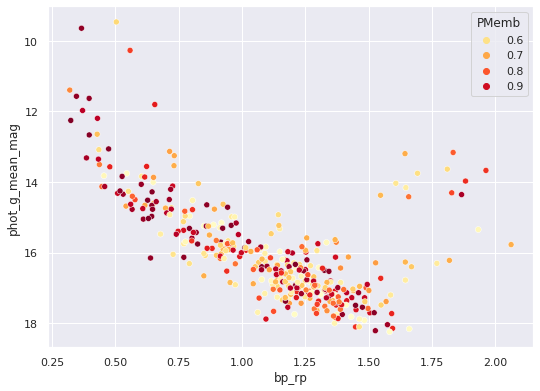

In [ ]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

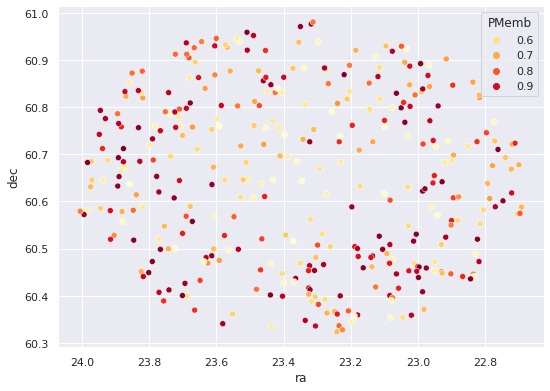

In [ ]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

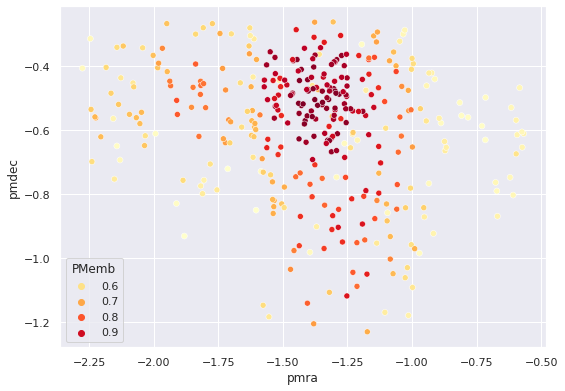

In [ ]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


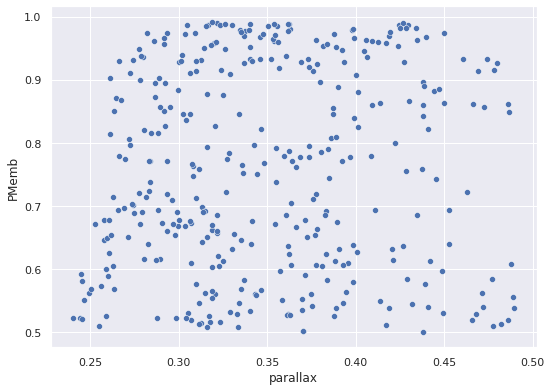

In [ ]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [ ]:
# saving the files as csv
# all_stars.to_csv('gaia_581_membership_prob.csv')

potentialMember.to_csv('NGC_581_membership_prob.csv')


### Comparing the old and new predicted members

In [ ]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [ ]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,6.310000e+02,6.310000e+02,6.310000e+02,631.0,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.0,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,629.000000,629.000000,629.000000,631.000000,629.000000,629.000000,629.000000,6.000000,6.000000,631.000000,6.000000,6.000000,6.0,631.000000,631.000000,631.000000,631.000000,501.000000,501.000000,501.000000,501.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,631.000000,631.000000,631.000000,631.000000,631.0,631.000000
mean,1.635721e+18,5.098588e+17,8.686516e+08,2015.5,23.342232,0.031410,60.653408,0.036189,0.357278,0.053723,8.627167,-1.389904,0.055311,-0.571599,0.071706,-0.282606,0.127381,-0.432772,0.083861,-0.118652,0.025031,-0.184016,-0.140163,0.209070,-0.511875,452.001585,26.717908,449.061807,2.939778,0.845324,490.280121,0.023811,0.656707,31.0,30.733496,1.568434,0.008802,-0.031068,51.641838,18.816165,...,620.799744,15.129784,1.256222,0.020602,1.030610,0.426342,0.604267,-34.238645,1.010353,0.150555,5333.333496,3.500000,0.0,128.050048,-1.800693,49.394363,46.261371,100024.998004,5713.884277,5480.376465,6005.438965,1.164505,0.846205,1.471100,0.584756,0.420089,0.743041,200111.0,4.442521,4.022355,4.810117,130.977890,108.331902,153.623901,0.167771,32.778934,10.078138,0.167767,1.0,0.683100
std,0.000000e+00,3.659420e+13,4.837556e+08,0.0,0.279513,0.016818,0.139350,0.019301,0.058970,0.028533,4.645422,0.308762,0.029254,0.195744,0.037669,0.087843,0.082841,0.066487,0.072401,0.079379,0.075848,0.089594,0.092525,0.081086,0.073795,34.643559,105.211878,34.472915,4.362850,5.220706,281.058868,0.076531,5.918309,0.0,65.483940,0.071124,0.004625,0.030519,3.865405,1.069546,...,404.221283,1.519782,0.087689,0.142161,0.355308,0.188753,0.180299,35.729696,0.400925,1.704661,516.397766,0.547723,0.0,0.135326,0.141028,0.206126,0.133684,217.952220,1089.851562,1017.100281,1161.306274,0.412322,0.404208,0.455653,0.207948,0.199748,0.236495,0.0,18.012861,16.443417,19.319000,1195.160400,988.559631,1402.403198,0.100046,18.051293,6.014579,0.100045,0.0,0.253312
min,1.635721e+18,5.097856e+17,2.885440e+05,2015.5,22.691278,0.009833,60.323639,0.011431,0.240353,0.016178,3.005832,-2.275765,0.017003,-1.324815,0.022449,-0.561925,-0.169424,-0.653858,-0.139639,-0.461236,-0.206913,-0.468784,-0.444580,-0.058535,-0.656098,264.000000,0.000000,248.000000,0.000000,-6.354753,285.132050,0.000000,

In [ ]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.670000e+02,2.670000e+02,2.670000e+02,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,266.000000,266.000000,266.000000,267.000000,266.000000,266.000000,266.000000,2.000000,2.000000,267.000000,2.000000,2.00000,2.0,267.000000,267.000000,267.000000,267.000000,224.000000,224.000000,224.000000,224.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0
mean,1.635721e+18,5.098628e+17,8.540371e+08,2015.5,23.330503,0.028689,60.659063,0.033327,0.367330,0.048839,9.614844,-1.387377,0.050012,-0.542598,0.065217,-0.277339,0.144364,-0.438381,0.081163,-0.130608,0.014315,-0.167820,-0.138793,0.212872,-0.504617,441.014981,40.685393,437.610487,3.404494,1.083980,482.858215,0.019025,0.298934,31.0,40.954811,1.588590,0.008112,-0.027482,50.509363,19.059925,...,648.882507,14.829006,1.251876,0.022472,0.932441,0.373573,0.558868,-49.753553,0.612721,0.149813,5000.000000,3.75000,0.0,128.043557,-1.796269,49.391494,46.269133,100027.857143,5987.355957,5735.266602,6293.960938,1.141717,0.814147,1.427530,0.574546,0.404568,0.719590,200111.0,5.284849,4.829564,5.702376,225.905777,187.249664,264.561890,0.075367,35.429630,10.394711,0.582023,0.075364,1.0
std,0.000000e+00,8.516773e+12,4.986873e+08,0.0,0.122878,0.014908,0.062493,0.017469,0.053889,0.025519,4.846479,0.229789,0.025892,0.177329,0.033589,0.090950,0.082057,0.063423,0.069967,0.079440,0.076259,0.076841,0.085245,0.070145,0.069112,32.351218,124.630696,32.887681,5.302969,5.078258,209.209549,0.065516,1.242774,0.0,77.136337,0.070800,0.004212,0.027772,3.651515,1.027884,...,396.034668,1.678544,0.119700,0.148491,0.355438,0.193452,0.186120,6.258113,0.414016,2.016853,707.106812,1.06066,0.0,0.061529,0.061231,0.082961,0.065139,230.796374,1156.451050,1082.770996,1240.789673,0.373470,0.367881,0.401953,0.187806,0.183072,0.203289,0.0,25.174301,22.985153,27.008451,1675.986694,1386.572388,1966.299072,0.044382,17.754373,5.809815,0.315357,0.044378,0.0
min,1.635721e+18,5.098376e+17,2.885440e+05,2015.5,23.006206,0.009833,60.517240,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.168981,-0.653858,-0.118199,-0.461236,-0.206913,-0.399843,-0.444580,-0.008753,-0.635927,264.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,

In [ ]:
concatenated.dataset.value_counts()

New_member    364
Old_member    267
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

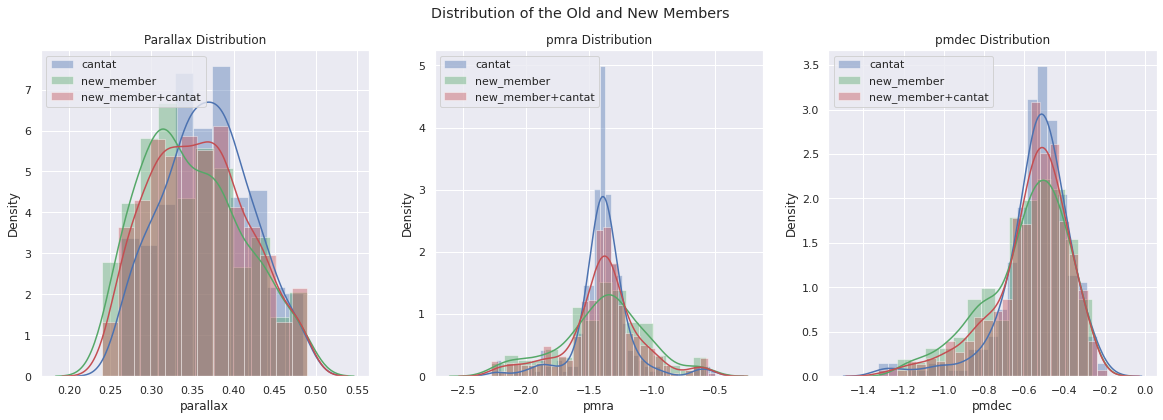

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


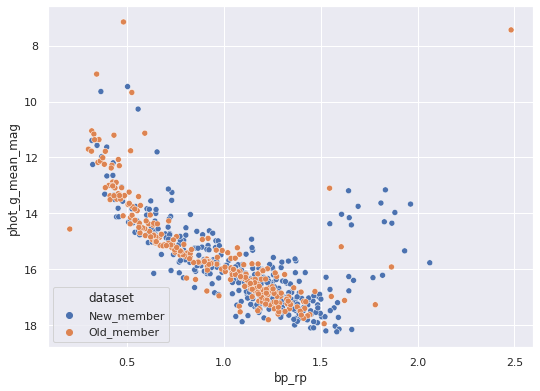

In [ ]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

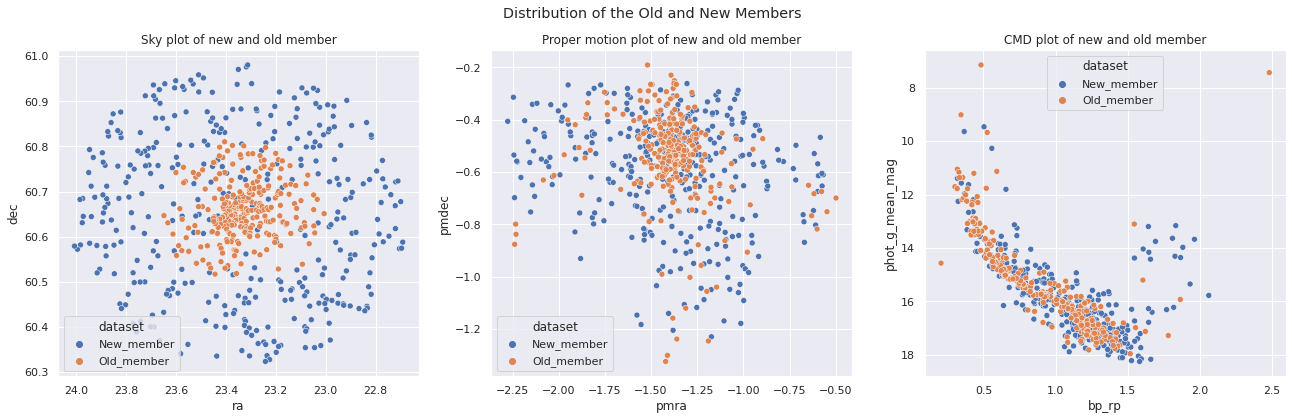

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

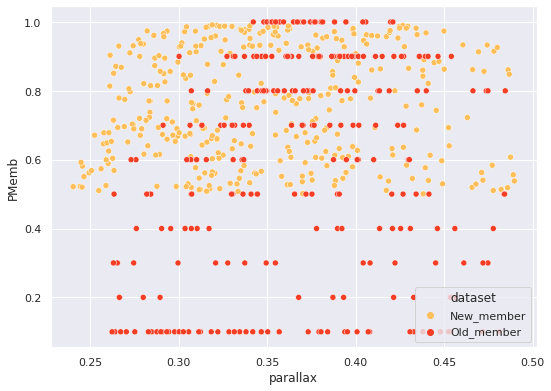

In [ ]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [ ]:
# pd_prof.ProfileReport(potentialMember)

In [ ]:
#files.download('NGC_581_cantat.csv')

#files.download('NGC_581_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


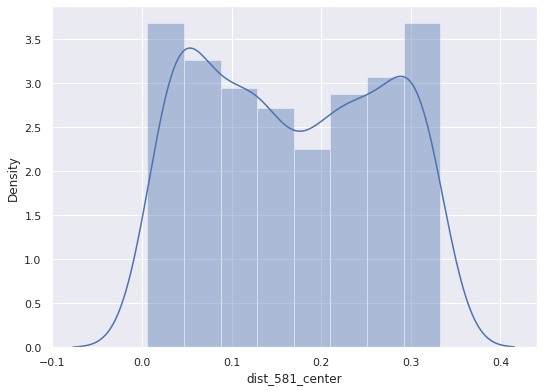

In [ ]:
sns.distplot(concatenated['dist_581_center'])

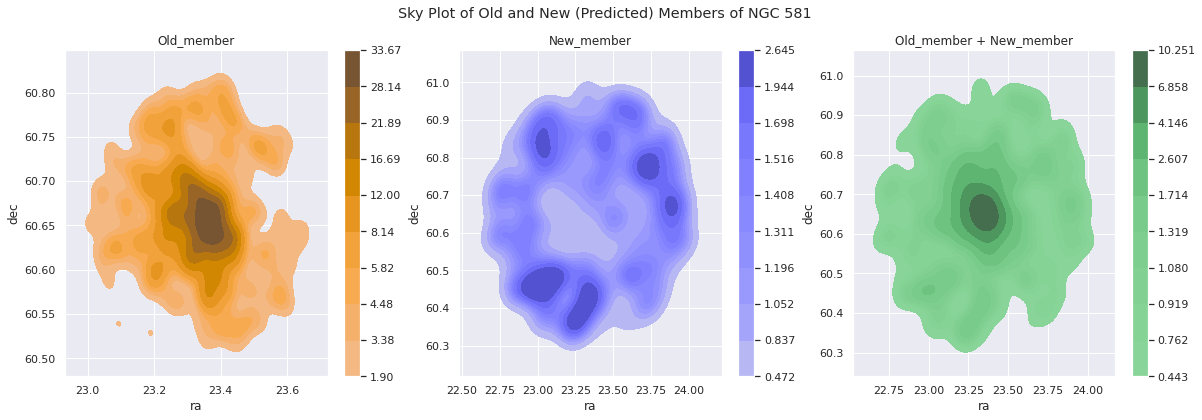

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

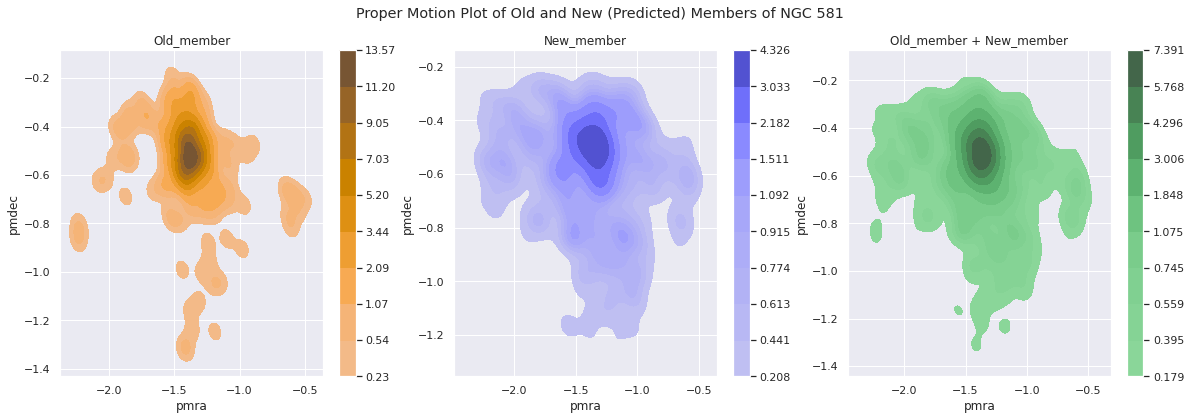

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [ ]:
#files.download('NGC_581_cantat.csv')

potentialMember.to_csv('NGC_581_additional_member_prob.csv')
concatenated.to_csv('NGC_581_all_member_prob.csv')

files.download('NGC_581_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_581_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>